In [1]:
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

#### REMOVE THIS LINE BEFORE SUBMISSION
import pandas as pd
#######################################################################

from lib.proj1_helpers import * #the helper provided for the project

from implementations import * #our implementations of the functions done by us
import datetime
from helpers import * #helpers of exo 2
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import csv
def load_csv_data(data_path, sub_sample=False):
    """Loads data and returns y (class labels), tX (features) and ids (event ids)"""
    y = np.genfromtxt(data_path, delimiter=",", skip_header=1, dtype=str, usecols=1)
    x = np.genfromtxt(data_path, delimiter=",", skip_header=1)
    ids = x[:, 0].astype(np.int)
    input_data = x[:, 2:]

    # convert class labels from strings to binary (-1,1)
    yb = np.ones(len(y))
    yb[np.where(y=='b')] = -1
    
    # sub-sample
    if sub_sample:
        yb = yb[::50]
        input_data = input_data[::50]
        ids = ids[::50]

    return yb, input_data, ids

In [3]:
DATA_FOLDER = 'data/'
data_file = DATA_FOLDER+'test.csv'

y_trai, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)

AAA = 0

In [4]:
train = pd.DataFrame(tx_train)
y_train = pd.DataFrame(y_trai)
test = pd.DataFrame(tx_test)
y_test = pd.DataFrame(y_test)
train.head()
train.shape

(250000, 30)

In [5]:
 ########## to extract name of columns ############################
#data_file =DATA_FOLDER +'train.xls'
#train = pd.read_excel(data_file)
#data_file =DATA_FOLDER +'test.xls'
#test = pd.read_excel(data_file)
#test.columns
#train.columns

In [6]:
columns = ['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

desired_cols = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

In [7]:
train.columns = desired_cols
test.columns = desired_cols
y_train.columns = ['Prediction']

In [8]:
train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [9]:
#y.head(10)

## now a generic part: 


In [10]:
### run this line if you wanna add the indexes
BBB = 0

In [11]:
train_ori = train.copy()
test_ori = test.copy()
if BBB == 0:
    train.reset_index(drop=False,inplace=True)
    test.reset_index(drop=False,inplace=True)
train.replace(-999, np.nan,inplace=True)
test.replace(-999, np.nan,inplace=True)

In [12]:
def jet_separation(data):
    jet0 = data[data['PRI_jet_num'] == 0]
    jet1 = data[data['PRI_jet_num'] == 1]
    jet2 = data[data['PRI_jet_num'] == 2]
    jet3 = data[data['PRI_jet_num'] == 3]
    tot = jet0.shape[0]+jet1.shape[0]+jet2.shape[0]+jet3.shape[0]
    
    print('Data: {data}\n jet0: {j0}\n jet1: {j1}\n jet2: {j2}\n jet3: {j3}\ntotat= {tot}'.format\
          (data=data.shape, j0=jet0.shape, j1=jet1.shape, j2=jet2.shape, j3=jet3.shape, tot=tot))
    
    return jet0, jet1, jet2, jet3

In [54]:
jet0, jet1, jet2, jet3 = jet_separation(train)

Data: (250000, 31)
 jet0: (99913, 31)
 jet1: (77544, 31)
 jet2: (50379, 31)
 jet3: (22164, 31)
totat= 250000


In [14]:
#print(jet3.info())
jet0.describe()

,index,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,99913.000000,73790.000000,99913.000000,99913.000000,99913.000000,0.0,0.0,0.0,99913.000000,99913.000000,...,99913.000000,99913.00000,99913.0,0.0,0.0,0.0,0.0,0.0,0.0,99913.0
mean,124892.549558,120.667654,58.786239,81.870309,13.823867,NaN,NaN,NaN,2.664961,13.823867,...,-0.024443,125.86081,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
std,72138.199984,51.750062,32.003551,38.043669,16.674707,NaN,NaN,NaN,0.693295,16.674707,...,1.811006,53.08660,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,3.000000,9.044000,0.002000,7.120000,0.000000,NaN,NaN,NaN,0.277000,0.000000,...,-3.142000,13.67800,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,62434.000000,90.241000,35.062000,60.947000,2.275000,NaN,NaN,NaN,2.338000,2.275000,...,-1.583000,87.95100,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
50%,124898.000000,111.452000,62.144000,75.533000,6.677000,NaN,NaN,NaN,2.822000,6.677000,...,-0.051000,119.47900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
75%,187392.000000,137.388500,79.650000,94.135000,24.202000,NaN,NaN,NaN,3.095000,24.202000,...,1.546000,156.41800,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
max,249999.000000,863.647000,570.115000,1349.351000,2834.999000,NaN,NaN,NaN,5.684000,2834.999000,...,3.142000,1391.52900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
### run this line if you wanna add the index line
AAA = 0

In [16]:
#def compute_proba_jet(data):

if AAA == 0:
    y_train.reset_index(drop=False,inplace=True)
    AAA=1

#y_train


In [17]:
y_train.columns

Index(['index', 'Prediction'], dtype='object')

In [18]:
def proportions(train, y_train, num_jet):
    num_back = y_train[train['PRI_jet_num']==num_jet].Prediction.value_counts()[-1]
    num_signal = y_train[train['PRI_jet_num']== num_jet].Prediction.value_counts()[1]
    prop = num_signal/(num_back+num_signal)
    print('Proportions of signal for jet{jet} are: {prop}'.format(jet=num_jet, prop=prop))

In [19]:
proportions(train, y_train, num_jet=0)
proportions(train, y_train, num_jet=1)
proportions(train, y_train, num_jet=2)
proportions(train, y_train, num_jet=3)

Proportions of signal for jet0 are: 0.2551419735169598
Proportions of signal for jet1 are: 0.35734550706695556
Proportions of signal for jet2 are: 0.5108080747930686
Proportions of signal for jet3 are: 0.3036906695542321


In [20]:
jet1['DER_mass_MMC'].describe()

count    69982.000000
mean       122.182109
std         59.344924
min          9.806000
25%         92.153250
50%        112.405500
75%        136.131750
max       1192.026000
Name: DER_mass_MMC, dtype: float64

In [21]:
train.columns

Index(['index', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

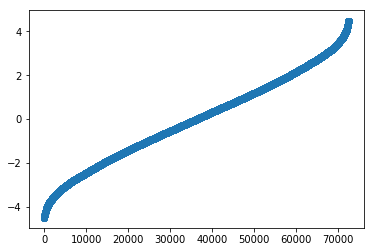

In [22]:
plt.scatter(train['index'],train.sort_values(['PRI_jet_subleading_eta']).PRI_jet_subleading_eta)

In [64]:
jet1['DER_met_phi_centrality'].describe()

count    77544.000000
mean         0.235612
std          1.106340
min         -1.414000
25%         -0.975000
50%          0.626500
75%          1.324000
max          1.414000
Name: DER_met_phi_centrality, dtype: float64

In [24]:
train.columns

Index(['index', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [25]:
31//3

10

## some test to extract the name of data for the plotting

In [27]:
import inspect

x,y,z = 1,2,3

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

retrieve_name(train)[0]

'train'

In [68]:
# Test funtion to visualize the dataset 
def plots_values_train_test(data):
    needed_subplots = (len(data.columns)-1)//3+1 # the first column being the index
    for k in range (needed_subplots):
        fig1, ax1 = plt.subplots(1,3)
        fig1.set_figheight(10)
        fig1.set_figwidth(30)

        for i,column in enumerate(data.columns[1+3*k:3*(k+1)+1]):
            ax1[i].set_title('Values in column {}'.format(column),fontsize=20,fontweight="bold")
            ax1[i].scatter(train['index'],train.sort_values([column])[column])

            
        #fig1.savefig('values{}.png'.format(k))
            #for j in range(len(texts)):
             #   texts[j].set_fontsize(15)
              #  autotexts[j].set_fontsize(15)

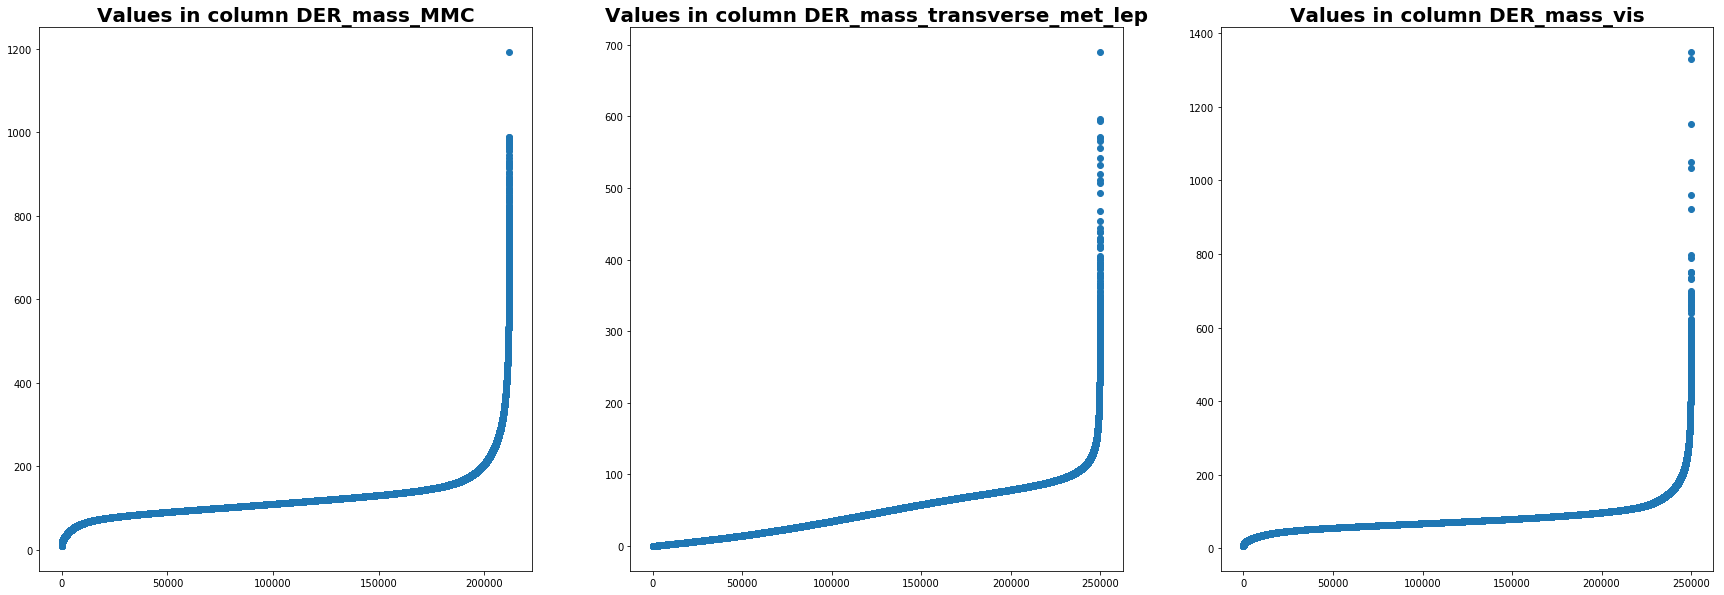

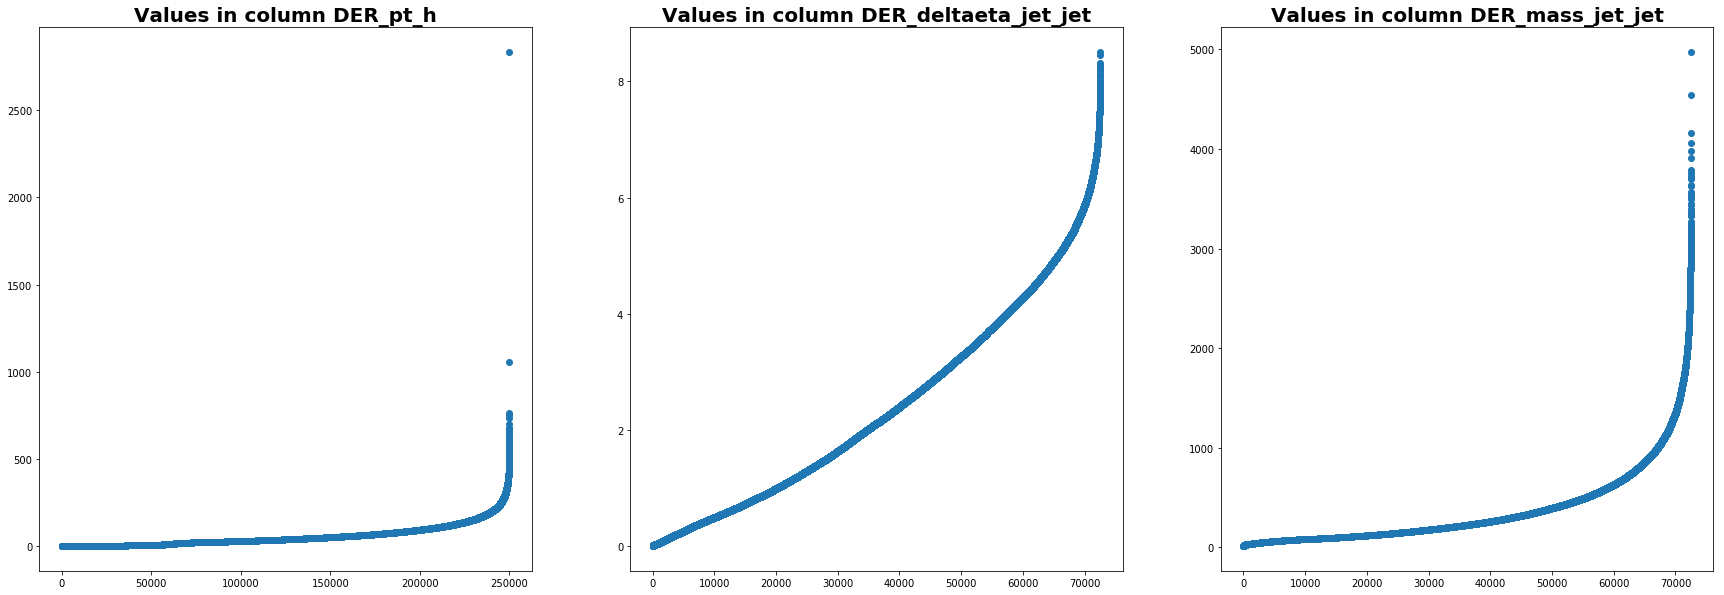

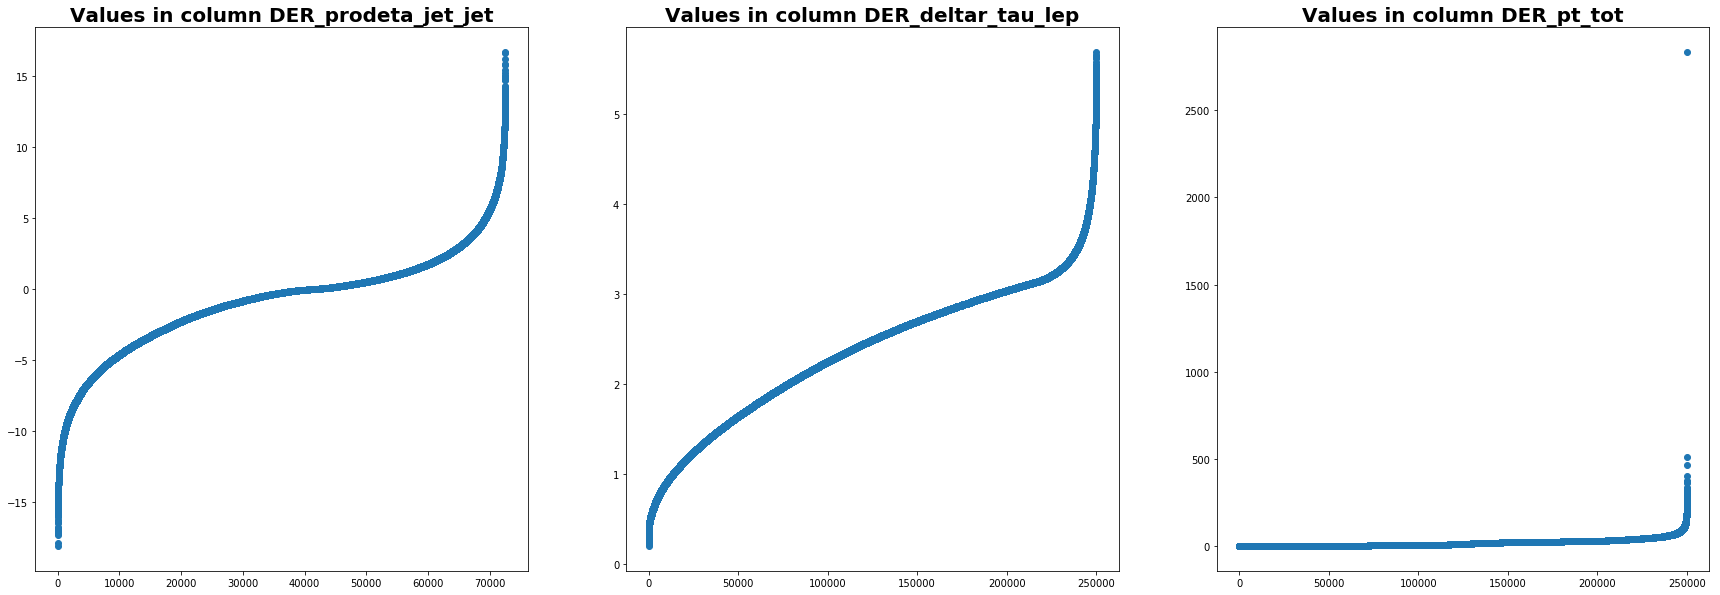

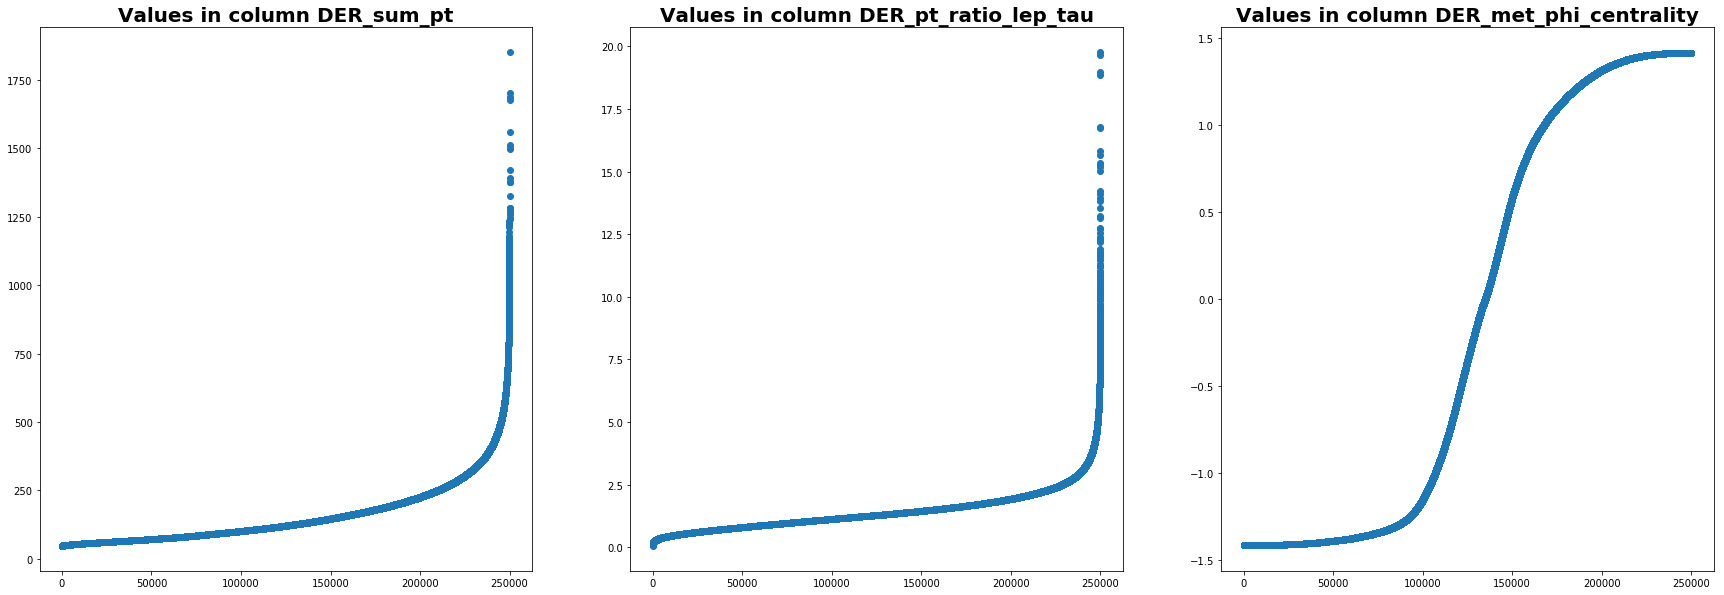

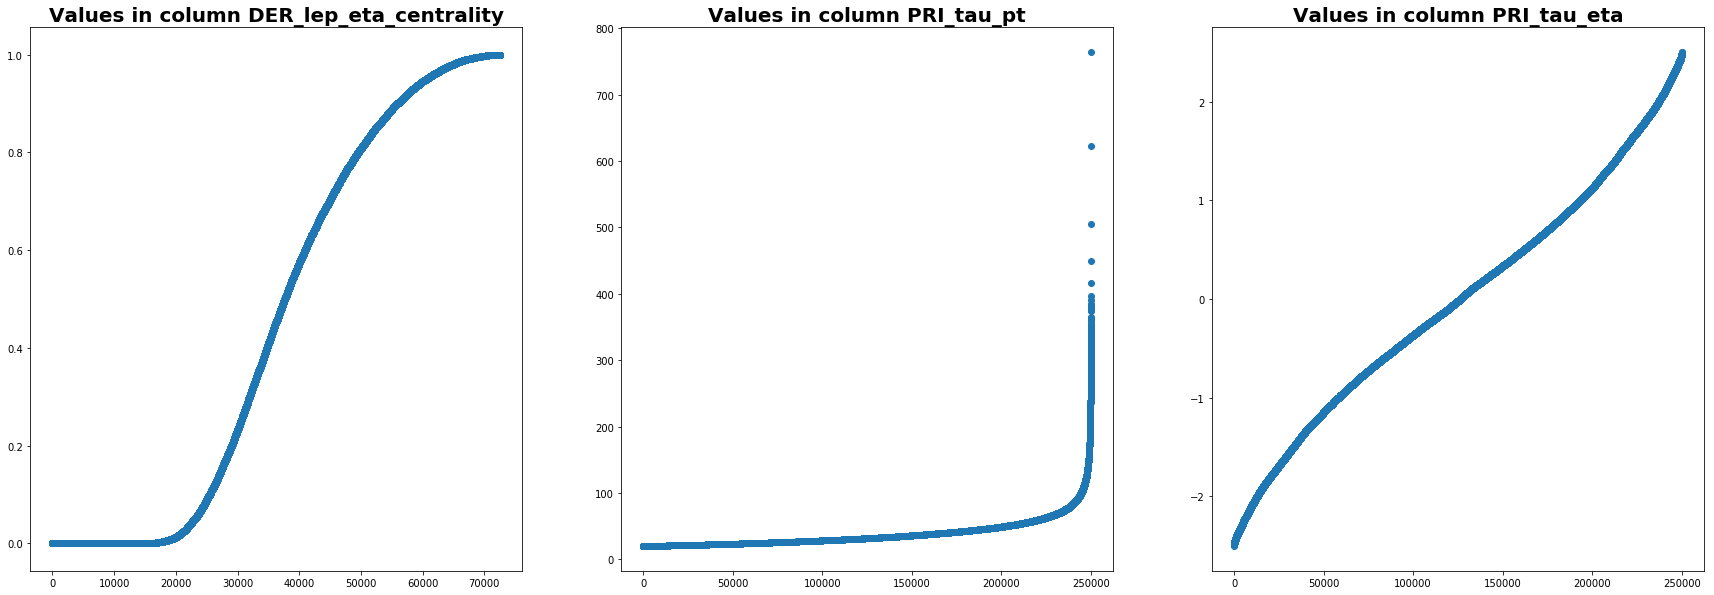

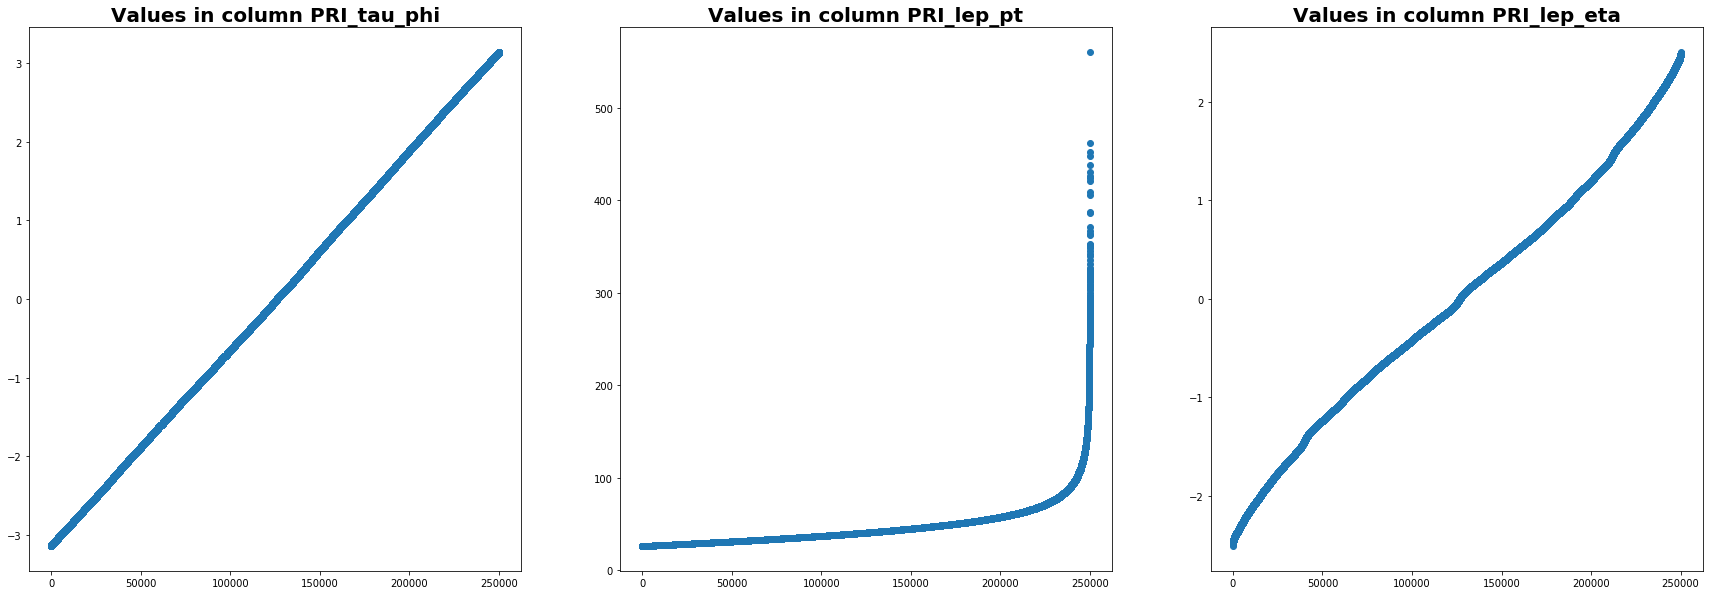

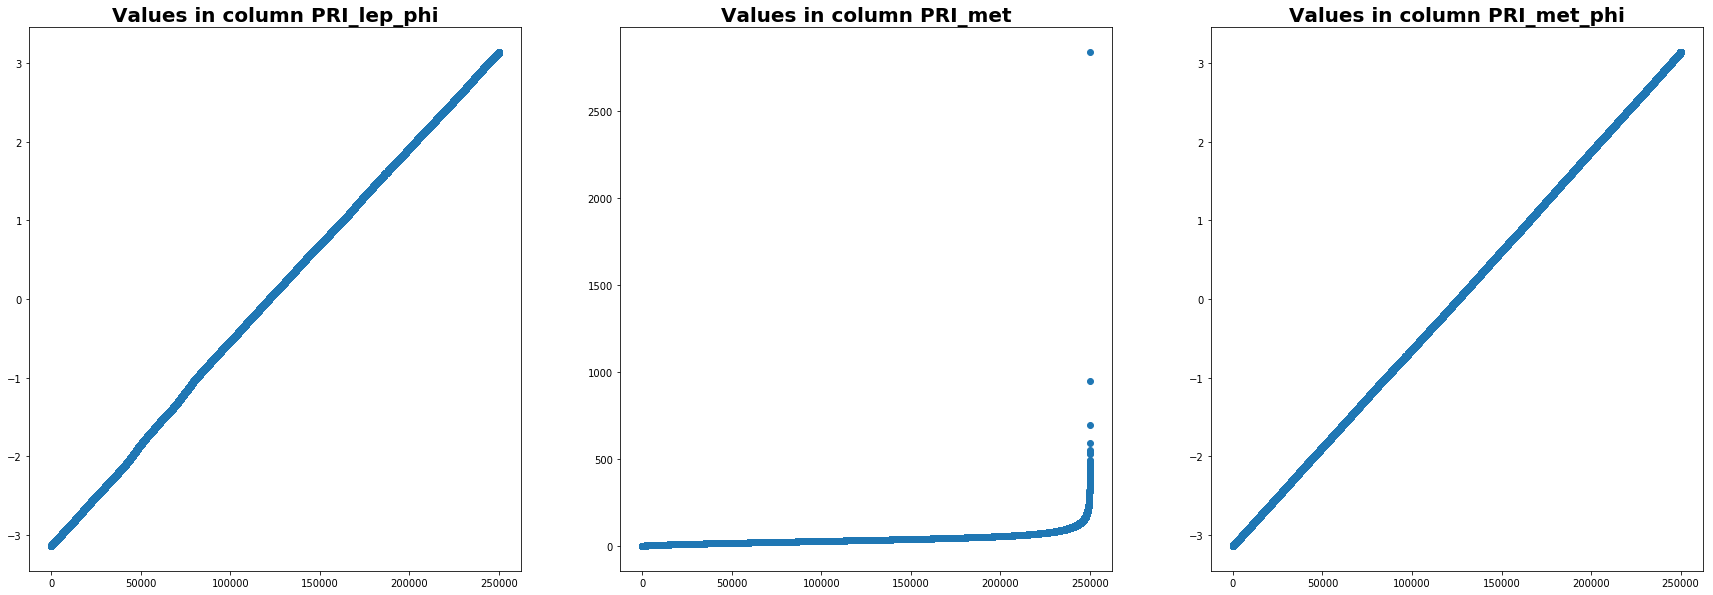

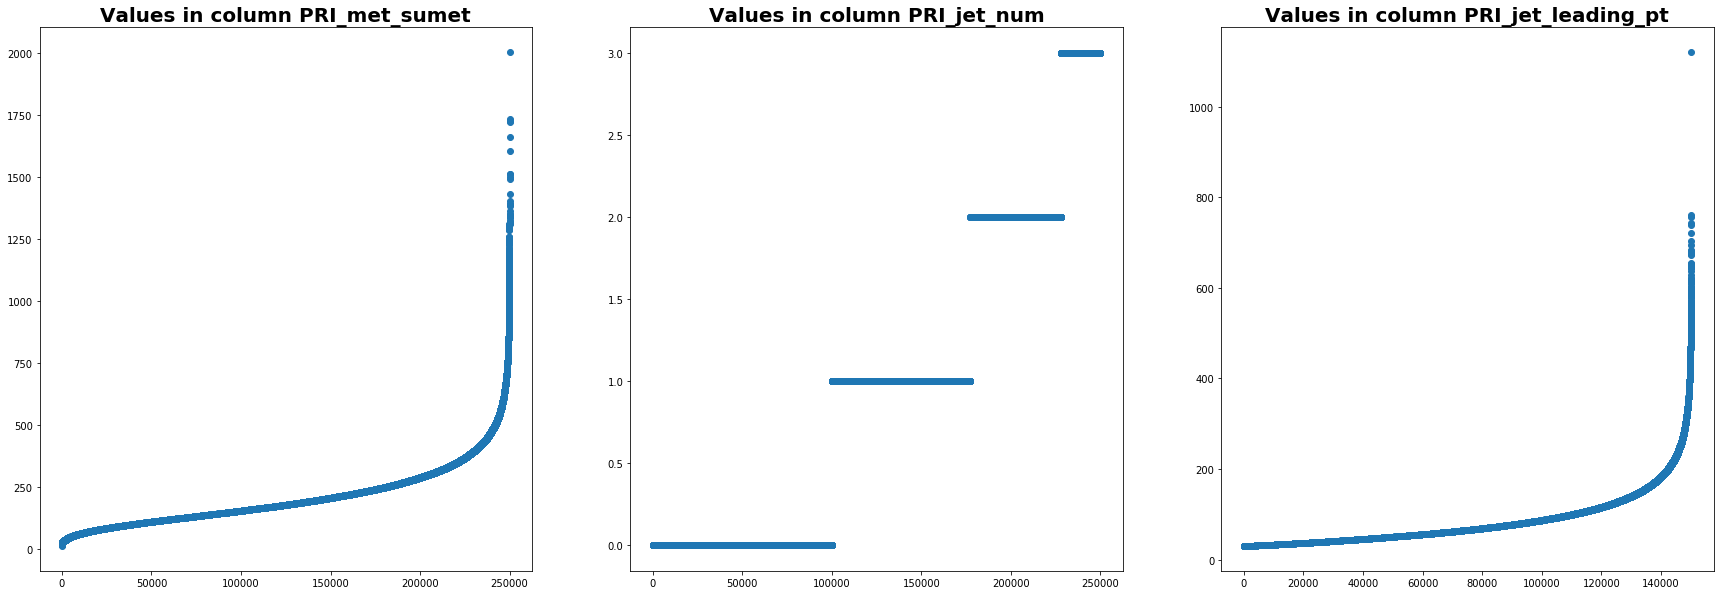

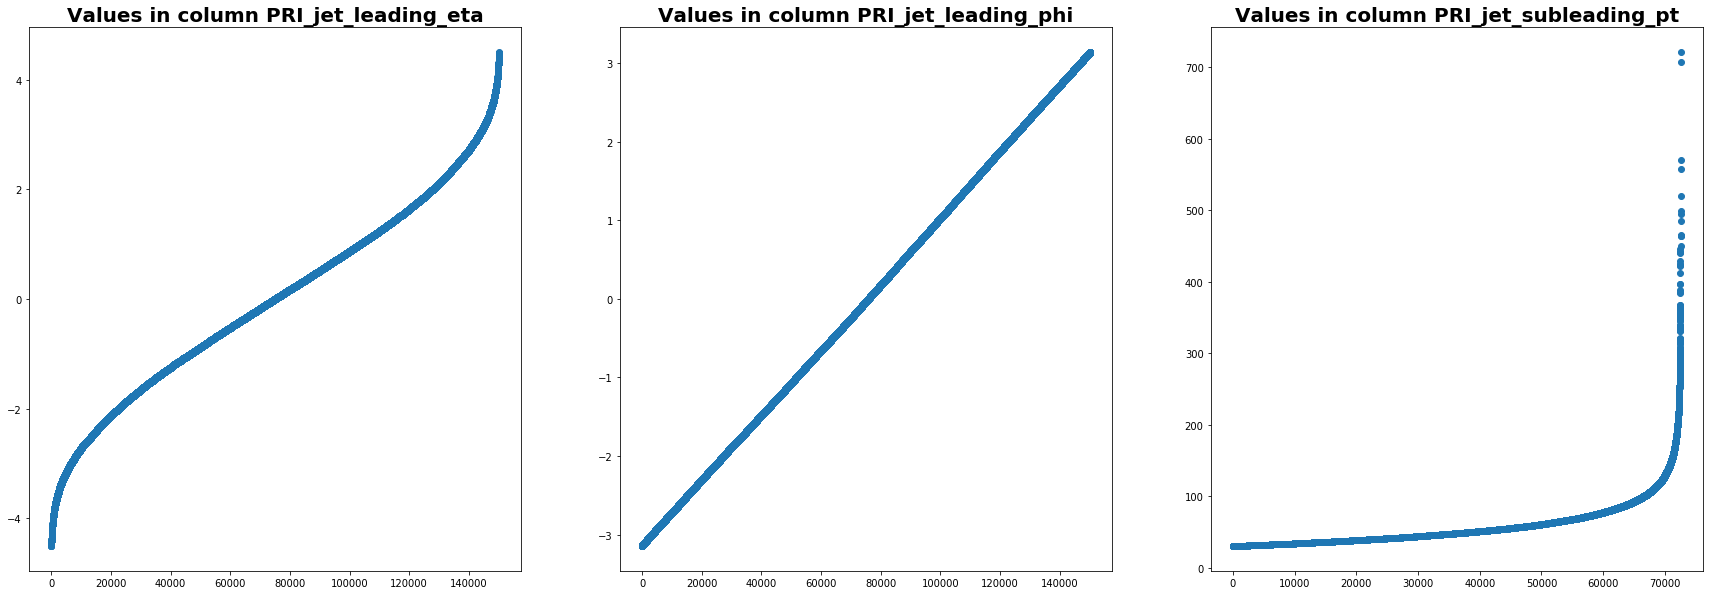

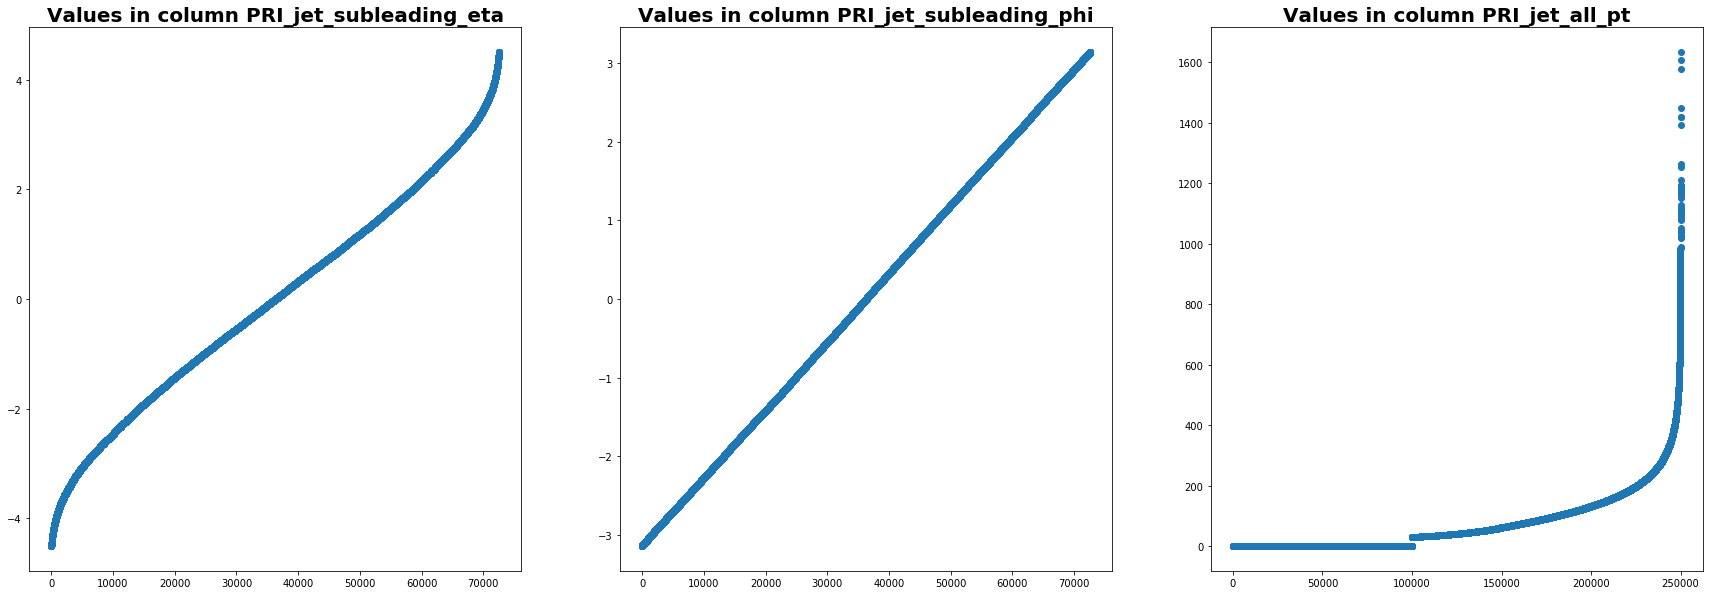

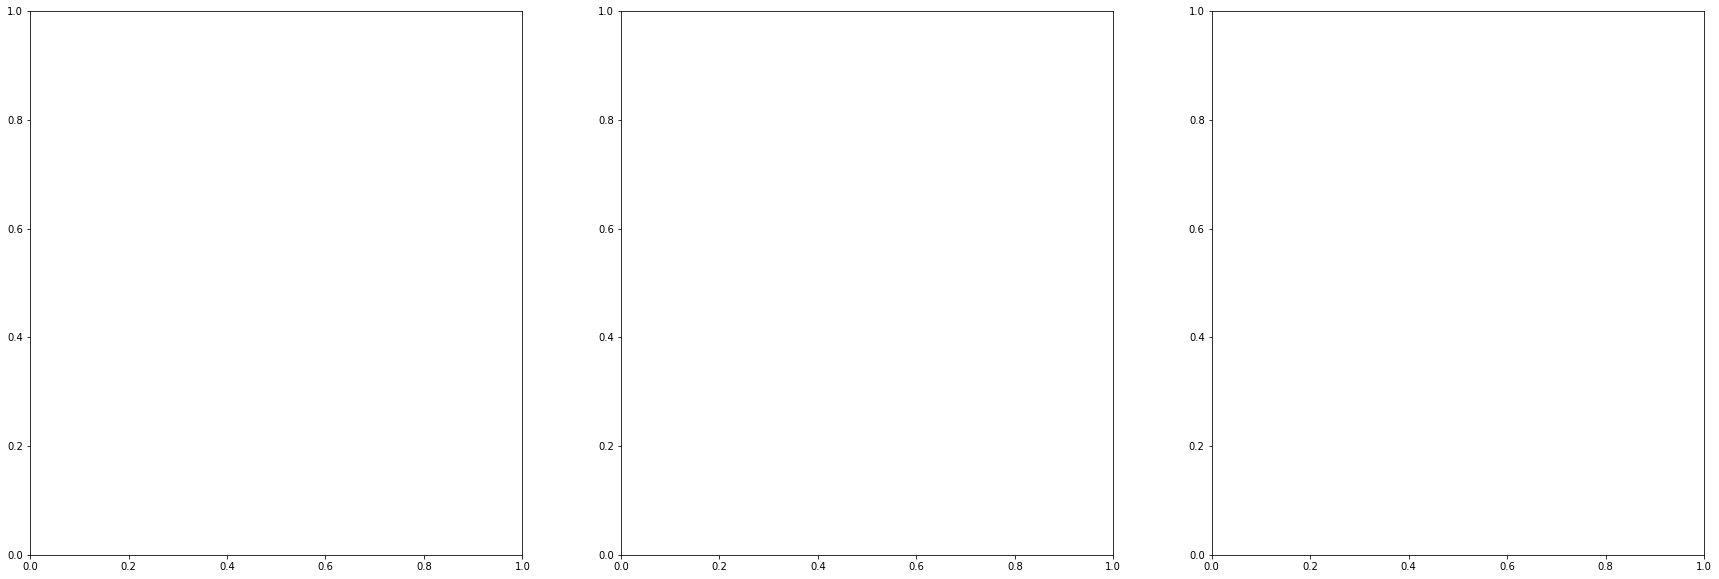

In [69]:
plots_values_train_test(train)

In [43]:
         
    #f, axarr = plt.subplots(2, 2)
    #axarr[0, 0].plot(x, y)
    #axarr[0, 0].set_title('Axis [0,0]')
    #axarr[0, 1].scatter(x, y)
    #axarr[0, 1].set_title('Axis [0,1]')
    #axarr[1, 0].plot(x, y ** 2)
    #axarr[1, 0].set_title('Axis [1,0]')
    #axarr[1, 1].scatter(x, y ** 2)
    #axarr[1, 1].set_title('Axis [1,1]')

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
    #plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    #plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

In [74]:
jet0.columns

Index(['index', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [72]:
 def compare_jets(data,jet0,jet1,jet2,jet3,data_name):
    #needed_subplots = (len(jet0.columns)-1) # the first column being the index
    fig1, ax1 = plt.subplots(len(data.columns[0:]),4)
    fig1.set_figheight(len(data.columns[1:-1])*10)
    fig1.set_figwidth(30)
    my_list = [jet0,jet1,jet2,jet3]
    
    for k,column in enumerate (data.columns[1:]):
        for i,jet in enumerate(my_list):
            ax1[k,i].set_title('{} in jet{}'.format(column,i),fontsize=20,fontweight="bold")
            ax1[k,i].scatter(jet['index'],jet.sort_values([column])[column])


    fig1.savefig(data_name+' jet comparison.png', bbox_inches='tight')
            #for j in range(len(texts)):
             #   texts[j].set_fontsize(15)
              #  autotexts[j].set_fontsize(15)

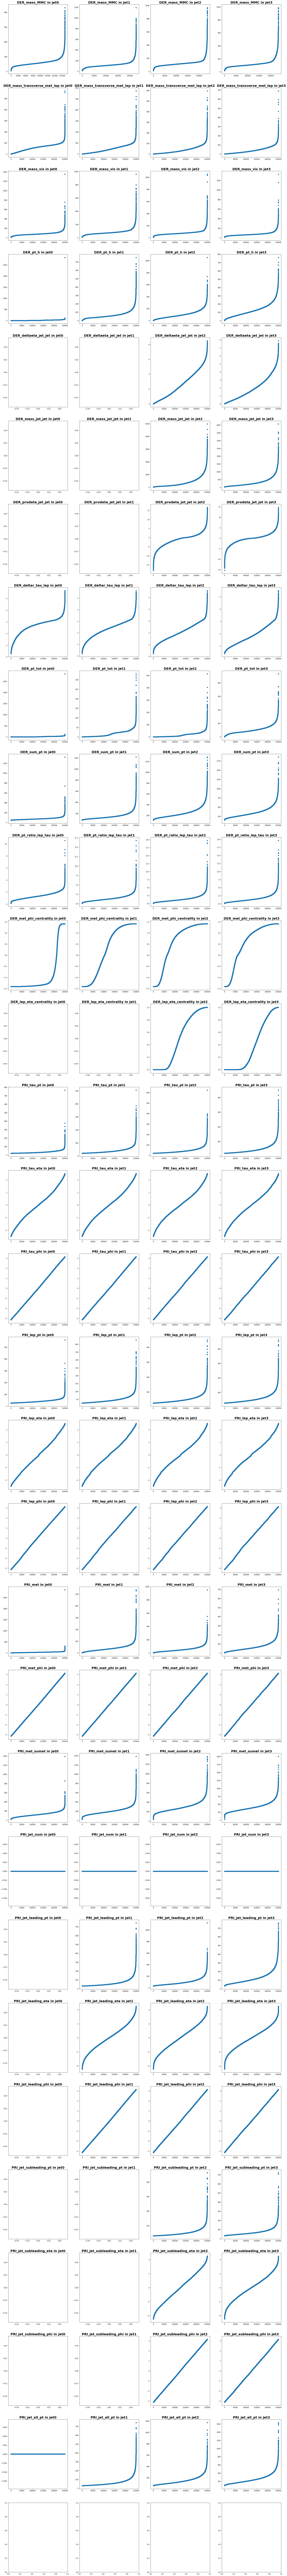

In [73]:
compare_jets(train,jet0,jet1,jet2,jet3,'train')

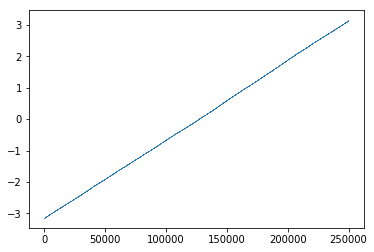

In [55]:
plt.scatter(jet0['index'],jet0.sort_values(['PRI_tau_phi'])['PRI_tau_phi'],s=0.00001)

## Writing this down in a file: 

In [243]:
def create_csv_file(ids, y_pred, name):
    """
    Creates an output file in csv format for submission to kaggle
    Arguments: ids (event ids associated with each prediction)
               y_pred (predicted class labels)
               name (string name of .csv output file to be created)
    """
    with open(name, 'w') as csvfile:
        fieldnames = ['Id', 'Prediction']
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({'Id':int(r1),'Prediction':int(r2)})